
## Twitter Sentiment Analysis
### Dataset Description:
The dataset (twitter_training.csv) for Twitter sentiment analysis contains the following columns:

##### id: Identifier for each tweet.
##### entity: Entity related to the tweet (e.g., brand or topic).
##### text: Text content of the tweet.
##### label: Label indicating sentiment category (not explicitly used in this code).
### Code Description:
This code performs sentiment analysis on tweets using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analyzer from NLTK:

### Loading and Preparing the Dataset:

Loads the dataset without headers and assigns column names (id, entity, text, label).
### Sentiment Analysis:

Initializes the VADER sentiment analyzer (SentimentIntensityAnalyzer).
Computes sentiment scores (compound score) for each tweet text using a defined function (get_sentiment_score).
## Visualization:

Visualizes average sentiment scores by entity using a bar plot.
Displays the distribution of sentiment scores across tweets using a histogram, highlighting the mean score and neutral sentiment threshold.

This analysis provides insights into the sentiment trends related to different entities on Twitter, aiding in understanding public opinion or sentiment towards specific brands or topics.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure you have downloaded the necessary NLTK data
nltk.download('vader_lexicon')

# Load the dataset without headers
data = pd.read_csv('twitter_training.csv', header=None)

display(data)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ziadk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
# Manually assign column names based on inspection
data.columns = ['id', 'entity', 'text', 'label']


# Print the head of the updated DataFrame
print("Updated DataFrame:")
display(data.head())


Updated DataFrame:


,id,entity,text,label
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis
data['sentiment_score'] = data['text'].apply(get_sentiment_score)

# Analyze sentiment by entity (e.g., brand or topic)
sentiment_by_entity = data.groupby('entity')['sentiment_score'].mean().reset_index()


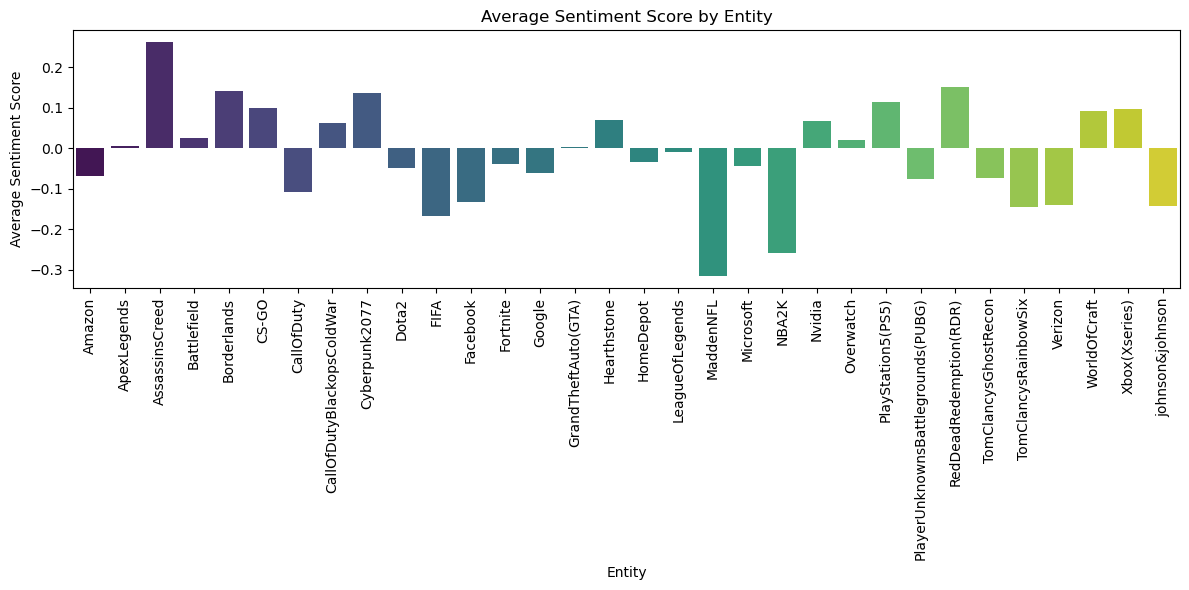

In [5]:
# Visualize sentiment by entity
plt.figure(figsize=(12, 6))
sns.barplot(x='entity', y='sentiment_score', data=sentiment_by_entity, palette='viridis')
plt.title('Average Sentiment Score by Entity')
plt.xlabel('Entity')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\ziadk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


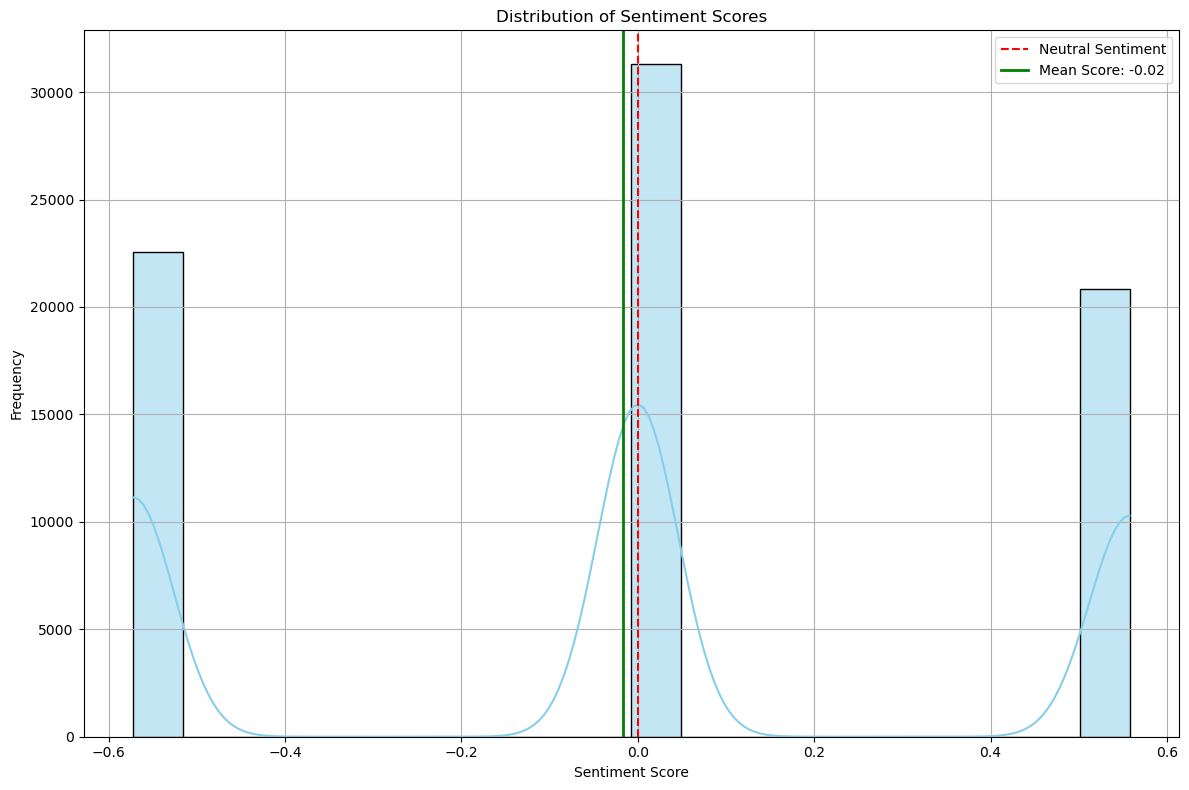

In [6]:
# Visualize sentiment distribution
plt.figure(figsize=(12, 8))
sns.histplot(data['sentiment_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Neutral Sentiment')
plt.axvline(x=data['sentiment_score'].mean(), color='green', linestyle='-', linewidth=2, label=f'Mean Score: {data["sentiment_score"].mean():.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()